In [1]:
import pandas as pd
import numpy as np


# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans, AffinityPropagation

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
food_data = pd.read_csv("food.csv")

In [3]:
food_data

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",80200,0,1.40,0,0,0.00,50,65,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,MACKEREL,"MACKEREL,SALTED",83110,0,13.40,0,0,0.00,95,95,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",90240,0,3.06,0,0,0.00,53,81,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,SNAIL,"SNAIL,RAW",90560,0,1.30,0,0,2.00,50,65,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


In [4]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [5]:
food_data=food_data.groupby(['Category'],as_index=False).mean()

In [6]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
food_data1=food_data.drop(['Category','Nutrient Data Bank Number','Data.Household Weights.1st Household Weight'
                           ,'Data.Household Weights.2nd Household Weight'],1)## Droping string features
food_data1 = food_data[['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein',
                         'Data.Fat.Total Lipid','Data.Vitamins.Vitamin A - IU']]

food_data1

C:\Users\marcu\AppData\Local\Temp/ipykernel_22924/1432360964.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  food_data1=food_data.drop(['Category','Nutrient Data Bank Number','Data.Household Weights.1st Household Weight'


,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Fat.Total Lipid,Data.Vitamins.Vitamin A - IU
0,8.530000,89.500000,147.000000,18.365000,3.770000,6.000000
1,17.600000,0.000000,69.000000,1.500000,0.100000,100.000000
2,7.690000,0.000000,32.000000,0.400000,0.300000,767.000000
3,4.800000,0.000000,23.000000,0.400000,0.300000,509.000000
4,54.650000,0.000000,501.000000,7.490000,30.170000,51.000000
...,...,...,...,...,...,...
1178,8.900000,0.000000,47.000000,2.620000,0.200000,588.333333
1179,34.696667,0.000000,194.333333,13.636667,0.736667,22.666667
1180,23.630000,0.000000,98.000000,1.460000,0.400000,8.000000
1181,0.000000,63.000000,166.500000,26.405000,5.980000,99.500000


In [7]:
from sklearn.preprocessing import normalize
food_scaled = normalize(food_data1)
food_scaled = pd.DataFrame(food_scaled, columns=food_data1.columns)
food_scaled

,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Fat.Total Lipid,Data.Vitamins.Vitamin A - IU
0,0.049183,0.516045,0.847583,0.105890,0.021737,0.034595
1,0.143355,0.000000,0.562016,0.012218,0.000815,0.814516
2,0.010017,0.000000,0.041683,0.000521,0.000391,0.999080
3,0.009420,0.000000,0.045139,0.000785,0.000589,0.998936
4,0.107685,0.000000,0.987195,0.014759,0.059448,0.100493
...,...,...,...,...,...,...
1178,0.015078,0.000000,0.079623,0.004439,0.000339,0.996701
1179,0.174204,0.000000,0.975705,0.068467,0.003699,0.113804
1180,0.233644,0.000000,0.968984,0.014436,0.003955,0.079101
1181,0.000000,0.306228,0.809317,0.128348,0.029067,0.483646


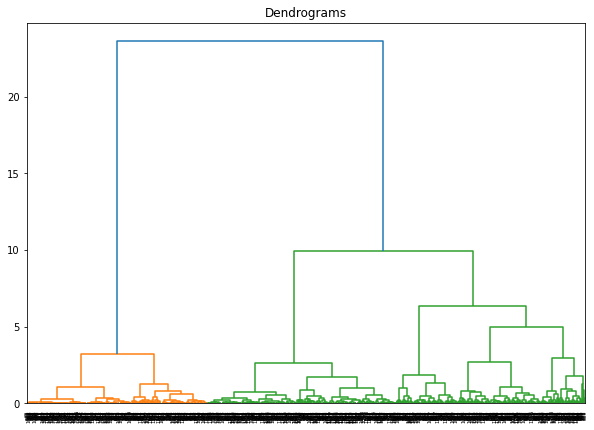

In [8]:
#Performs hierarchial clustering and plots graph

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(food_scaled, method='ward'))

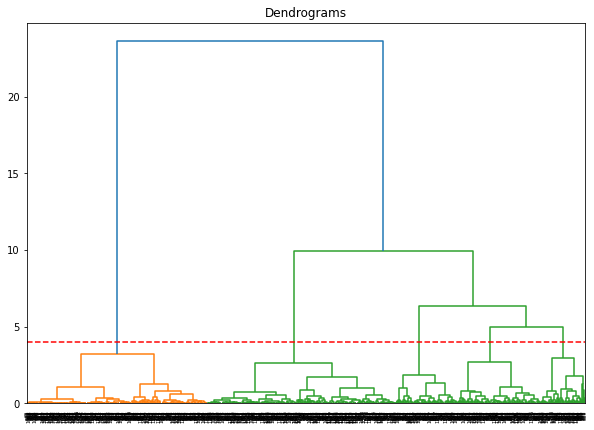

In [9]:
#Adds line to the diagram

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(food_scaled, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

In [10]:
#Adds Cluster No to each food item

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusterNo = cluster.fit_predict(food_scaled)
food_data['Cluster']=clusterNo
food_data

,Category,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster
0,ABALONE,15155.500000,0.0,1.670000,0.000000,0.0,8.530000,89.500000,32.500000,0.000000,...,446.000000,0.885000,6.000000,2.000000,0.710000,0.150000,1.900000,2.000000,11.500000,1
1,ABIYUCH,9427.000000,0.0,0.900000,60.000000,0.0,17.600000,0.000000,0.000000,5.300000,...,20.000000,0.310000,100.000000,5.000000,0.000000,0.000000,54.100000,0.000000,0.000000,3
2,ACEROLA,9001.000000,0.0,0.200000,0.000000,0.0,7.690000,0.000000,0.000000,1.100000,...,7.000000,0.100000,767.000000,38.000000,0.000000,0.009000,1677.600000,0.000000,0.000000,0
3,ACEROLA JUICE,9002.000000,0.0,0.200000,305.000000,0.0,4.800000,0.000000,0.000000,0.300000,...,3.000000,0.100000,509.000000,25.000000,0.000000,0.004000,1600.000000,0.180000,1.400000,0
4,ACORN FLOUR,12060.000000,0.0,1.690000,0.000000,0.0,54.650000,0.000000,0.000000,0.000000,...,0.000000,0.640000,51.000000,3.000000,0.000000,0.688000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,YARDLONG BEAN,11432.666667,0.0,0.686667,0.000000,0.0,8.900000,0.000000,0.000000,0.000000,...,82.666667,0.363333,588.333333,29.666667,0.000000,0.024000,17.066667,0.000000,0.000000,0
1179,YARDLONG BNS,16233.666667,0.0,2.256667,0.000000,0.0,34.696667,0.000000,0.000000,6.200000,...,87.666667,1.886667,22.666667,1.333333,0.000000,0.187000,0.800000,0.000000,0.000000,4
1180,YAUTIA (TANNIER),11991.000000,0.0,1.450000,5.000000,0.0,23.630000,0.000000,0.000000,1.500000,...,21.000000,0.500000,8.000000,0.000000,0.000000,0.237000,5.200000,0.000000,0.000000,2
1181,YELLOWTAIL,15180.000000,0.0,1.245000,0.000000,0.0,0.000000,63.000000,0.000000,0.000000,...,44.500000,0.595000,99.500000,30.000000,1.275000,0.172500,2.850000,0.000000,0.050000,1


In [11]:
#Get mean for each macronutrient in each cluster

Cluster_Data_Carbohydrate=pd.DataFrame(food_data.groupby(["Cluster"])['Data.Carbohydrate'].mean())
Cluster_Data_Cholesterol=pd.DataFrame(food_data.groupby(["Cluster"])['Data.Cholesterol'].mean())
Cluster_Data_Kilocalories=pd.DataFrame(food_data.groupby(["Cluster"])['Data.Kilocalories'].mean())
Cluster_Data_Protein=pd.DataFrame(food_data.groupby(["Cluster"])['Data.Protein'].mean())
Cluster_Data_Fat_TotalLipid=pd.DataFrame(food_data.groupby(["Cluster"])['Data.Fat.Total Lipid']).mean()
Cluster_Data_Vitamins_VitaminA=pd.DataFrame(food_data.groupby(["Cluster"])['Data.Vitamins.Vitamin A - IU'].mean())

C:\Users\marcu\AppData\Local\Temp/ipykernel_22924/4020734227.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Cluster_Data_Fat_TotalLipid=pd.DataFrame(food_data.groupby(["Cluster"])['Data.Fat.Total Lipid']).mean()


In [12]:
#PLots dataframe of mean macronutrients in each cluster

df = pd.concat([Cluster_Data_Carbohydrate,Cluster_Data_Cholesterol,Cluster_Data_Kilocalories,Cluster_Data_Protein,
                Cluster_Data_Fat_TotalLipid,Cluster_Data_Vitamins_VitaminA], axis=1)

In [76]:

df.columns = ['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein',
            'Data.Fat.Total Lipid','Data.Vitamins.Vitamin A - IU']
df

,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Fat.Total Lipid,Data.Vitamins.Vitamin A - IU
0,14.925879,15.976107,122.871315,5.641252,2.0,2781.142132
1,3.024663,108.865963,157.361058,20.482846,NaN,81.268373
2,27.531037,9.472808,271.953076,9.671032,NaN,6.048071
3,16.607215,23.460954,160.423530,10.586488,NaN,196.245177
4,33.087970,9.346199,246.784179,9.297097,NaN,89.702445


In [62]:
cluster0=food_data.loc[food_data['Cluster'] ==0]
cluster0['Category'].value_counts()

ABALONE            1
PORK               1
PIGEONPEAS         1
PIKE               1
PINEAPPLE          1
                  ..
FRUIT PUNCH DRK    1
FRZ NVL            1
FT FDS             1
Fish               1
YELLOWTAIL         1
Name: Category, Length: 269, dtype: int64

In [63]:
cluster1=food_data.loc[food_data['Cluster'] ==1]
cluster1['Category'].value_counts()

ACEROLA             1
PEACH NECTAR        1
PICKLE RELISH       1
PERSIMMONS          1
PEPPERS             1
                   ..
DILL WEED           1
DANDELION GRNS      1
DANDELION GREENS    1
DAIRY DRK MIX       1
YARDLONG BEAN       1
Name: Category, Length: 382, dtype: int64

In [64]:
cluster2=food_data.loc[food_data['Cluster'] ==2]
cluster2['Category'].value_counts()

ACORN FLOUR              1
POPEYES                  1
PRUNE JUICE              1
PRETZELS                 1
PRAIRIE TURNIPS          1
                        ..
HAZELNUTS OR FILBERTS    1
HAM                      1
GUANABANA NECTAR         1
GRY                      1
YAUTIA (TANNIER)         1
Name: Category, Length: 402, dtype: int64

In [65]:
cluster3=food_data.loc[food_data['Cluster'] ==3]
cluster3['Category'].value_counts()

ABIYUCH                         1
Pancakes plain                  1
POTATO SALAD                    1
PIZZA HUT 14" CHS PIZZA         1
PIZZA HUT 12" CHS PIZZA         1
                               ..
EGGPLANT                        1
EGGNOG-FLAVOR MIX               1
DRUM                            1
DOMINO'S 14" Pepperoni Pizza    1
YOGURT                          1
Name: Category, Length: 130, dtype: int64

In [77]:
cluster4=food_data.loc[food_data['Cluster'] ==4]
cluster4['Category'].value_counts()

AGAVE                              1
MILK DSSRT                         1
PANCAKES                           1
PAPA JOHN'S 14" THE WORKS PIZZA    1
PARMESAN CHS TOPPING               1
                                  ..
FROZ NOVLT                         1
FROZEN NOVELT                      1
FRUIT PUNCH DRK                    1
FRZ NVL                            1
YARDLONG BNS                       1
Name: Category, Length: 177, dtype: int64

Hierarchical clustering is not useful as there are different foods in each cluster and using .groupby() is not useful as different food items under the same category may have differing macronutrients (e.g. boiled chicken and fried chicken)